In [1]:
import os

HOME = os.getcwd()
print(HOME)

/content


In [2]:
!mkdir {HOME}/images

In [3]:
%cd {HOME}/images

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-5.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-6.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-7.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-8.jpeg

/content/images


In [4]:
!pip install -q supervision

import supervision as sv

print(sv.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.5 MB/s eta 0:00:00
0.19.0


In [5]:
import cv2

IMAGE_PATH = f"{HOME}/images/dog.jpeg"

image = cv2.imread(IMAGE_PATH)

In [6]:
!pip install -q super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 9.3 MB/s 

In [7]:
from super_gradients.training import models

model = models.get("yolo_nas_l", pretrained_weights="coco")
result = model.predict(image)
detections = sv.Detections.from_yolo_nas(result)

The console stream is logged into /root/sg_logs/console.log


[2024-04-01 06:03:37] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-04-01 06:03:38] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-04-01 06:03:45] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-04-01 06:03:47] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-04-01 06:03:47] WARNING - export.py - Failed to import pytorch_quantization
[2024-04-01 06:03:47] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-04-01 06:03:47] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2024-04-01 06:03:47] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-04-01 06:03:47] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-04-01 06:03:47] WARNING - env_sanity_check.py - 

In [8]:
"detections", len(detections)

('detections', 7)

In [9]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 9.3 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
result = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(result)

100%|██████████| 21.5M/21.5M [00:00<00:00, 172MB/s]


In [11]:
"detections", len(detections)

('detections', 4)

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


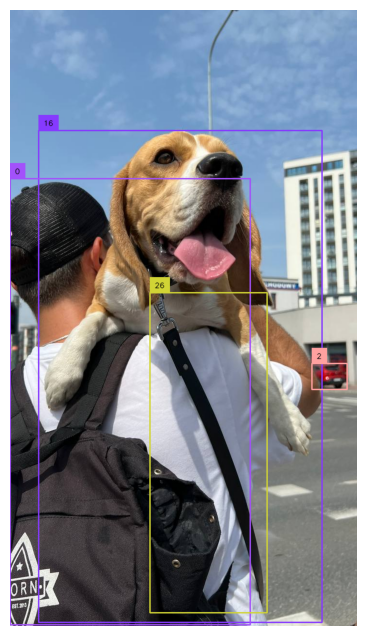

In [12]:
box_annotator = sv.BoxAnnotator()

annotated_image = box_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


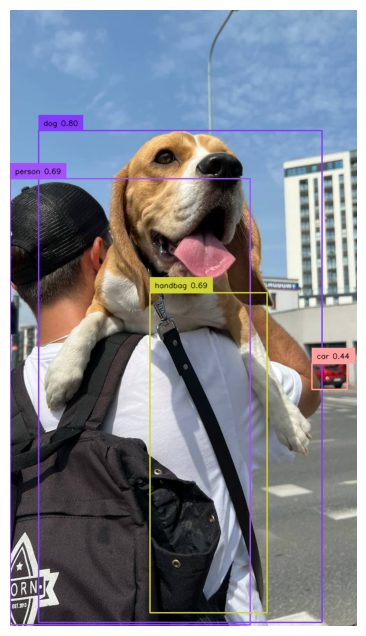

In [13]:
box_annotator = sv.BoxAnnotator()

labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]
annotated_image = box_annotator.annotate(
    image.copy(), detections=detections, labels=labels
)

sv.plot_image(image=annotated_image, size=(8, 8))

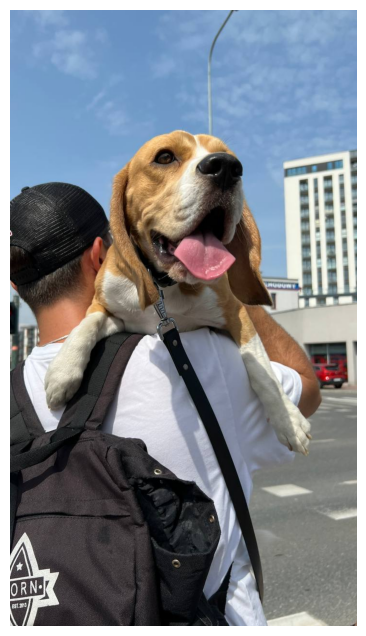

In [14]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

annotated_image = mask_annotator.annotate(image.copy(), detections=detections)

sv.plot_image(image=annotated_image, size=(8, 8))

In [15]:
detections_index = detections[0]
detections_index_list = detections[[0, 1, 3]]
detections_index_slice = detections[:2]

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


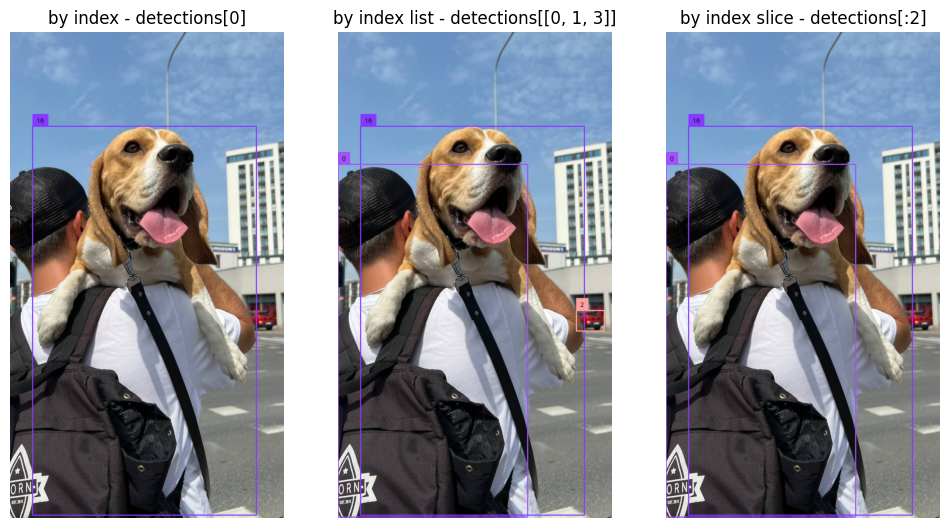

In [16]:
box_annotator = sv.BoxAnnotator()

images = [
    box_annotator.annotate(image.copy(), detections=d)
    for d in [detections_index, detections_index_list, detections_index_slice]
]
titles = [
    "by index - detections[0]",
    "by index list - detections[[0, 1, 3]]",
    "by index slice - detections[:2]",
]

sv.plot_images_grid(images=images, titles=titles, grid_size=(1, 3))

In [17]:
detections_filtered = detections[detections.class_id == 0]

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


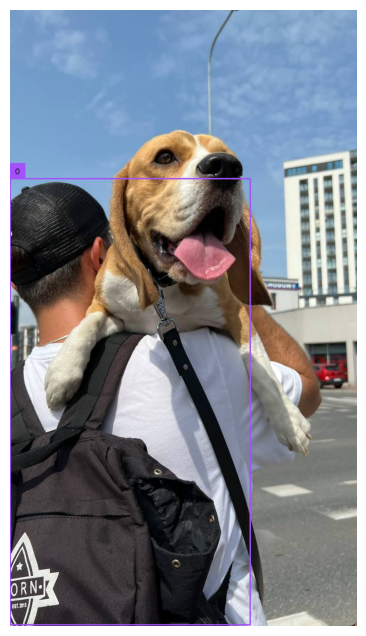

In [18]:
box_annotator = sv.BoxAnnotator()
annotated_image = box_annotator.annotate(image.copy(), detections=detections_filtered)
sv.plot_image(image=annotated_image, size=(8, 8))

In [19]:
detections_filtered = detections[detections.confidence > 0.75]

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


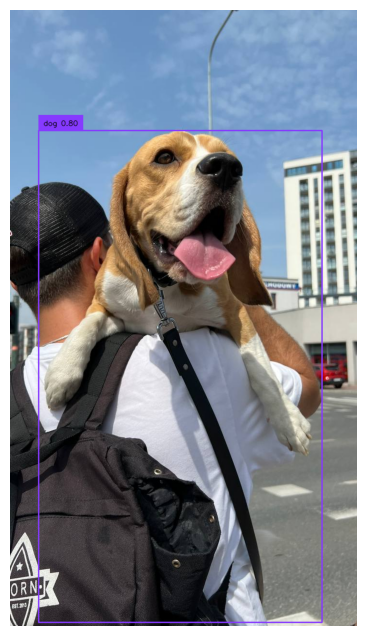

In [20]:
box_annotator = sv.BoxAnnotator()
labels = [
    f"{model.model.names[class_id]} {confidence:.2f}"
    for class_id, confidence in zip(
        detections_filtered.class_id, detections_filtered.confidence
    )
]
annotated_image = box_annotator.annotate(
    image.copy(), detections=detections_filtered, labels=labels
)
sv.plot_image(image=annotated_image, size=(8, 8))

In [21]:
detections_filtered = detections[
    (detections.class_id != 0) & (detections.confidence > 0.75)
]

SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


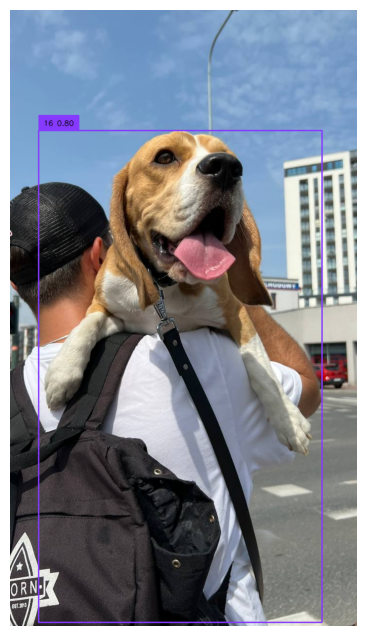

In [22]:
box_annotator = sv.BoxAnnotator()
labels = [
    f"{class_id} {confidence:.2f}"
    for class_id, confidence in zip(
        detections_filtered.class_id, detections_filtered.confidence
    )
]
annotated_image = box_annotator.annotate(
    image.copy(), detections=detections_filtered, labels=labels
)
sv.plot_image(image=annotated_image, size=(8, 8))

In [23]:
!pip install -q supervision[assets]

In [24]:
!mkdir {HOME}/videos

In [25]:
%cd {HOME}/videos

In [33]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.
